# Table of contents
* [Sample data.](#Sample-data.)
* [Plot two sets of data points on the same figure.](#Plot-two-sets-of-data-points-on-the-same-figure.)
* [Plot two sets of data with error bars on the same figure.](#Plot-two-sets-of-data-with-error-bars-on-the-same-figure.)
* [Display the two sets of data on two separate plots.](#Display-the-two-sets-of-data-on-two-separate-plots.)
* [Fit the data without accounting for uncertainties in the data.](#Fit-the-data-without-accounting-for-uncertainties-in-the-data.)
* [Fit the data while incorporating experimental uncertainty.](#Fit-the-data-while-incorporating-experimental-uncertainty.)
* [Make a histogram.](#Make-a-histogram.)
* [Read in data from a .csv file.](#Read-in-data-from-a-.csv-file.)

# Sample data.

This cell always needs to be run when you are running these examples, so that you load up the data into the Python kernel. 

If you are cutting and pasting, start with this cell and then choose the plotting/fitting option below that suits your needs. 

In [1]:
# Sample code for making plots and fitting data. 
import numpy as np
import matplotlib.pylab as plt

# Comment this next line if running in IDLE or any other non-Notebook environment.
%matplotlib inline


# First create some arrays to hold your data points. 

# First set of points
x1 = np.array([0, 0.5, 0.9, 1.4])
y1 = np.array([0, 1.5, 4.8, 13.2])
y1err = np.array([0.5, 0.8, 1.2, 1.9])

# Second set of points
x2 = np.array([0.2, 1.0, 2.1, 2.5])
y2 = np.array([0.3, 2.5, 5.1, 12.9])
y2err = np.array([0.5, 1.2, 2.4, 2.5])

# MAKE SURE THERE ARE THE SAME NUMBER OF POINTS IN YOUR X AND Y ARRAY!
print len(x1),len(y1)

4 4


# Plot two sets of data points on the same figure. 

This example plots two sets of data on one figure. 

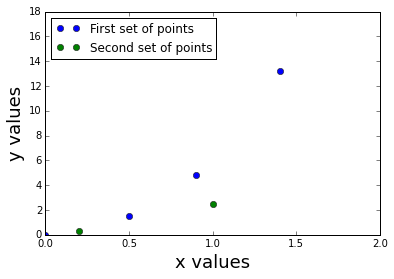

In [2]:
# Plot just the data points
plt.figure()
plt.plot(x1,y1,'o',label="First set of points")
plt.plot(x2,y2,'o',label="Second set of points")
plt.xlim(0,2)
plt.ylim(0,18)
plt.xlabel('x values',fontsize=18)
plt.ylabel('y values',fontsize=18)
plt.legend(loc='upper left')

# Uncomment the following to save the file as a .png format. Feel free to change the name from "myfigure.png"
#plt.savefit('myfigure.png')

# Uncomment the following if running on a non-Notebook environment.
#plt.show()

# Plot two sets of data with error bars on the same figure. 

Adds errorbars using the **errorbar** function. 

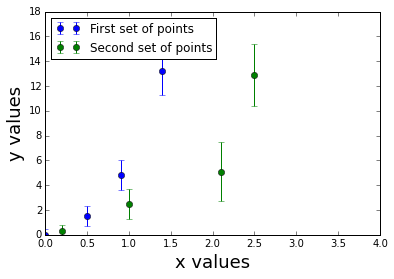

In [3]:
# Plot data points and uncertainties
plt.figure()
plt.errorbar(x1,y1,yerr=y1err,fmt='o',label="First set of points")
plt.errorbar(x2,y2,yerr=y2err,fmt='o',label="Second set of points")
plt.xlim(0,4)
plt.ylim(0,18)
plt.xlabel('x values',fontsize=18)
plt.ylabel('y values',fontsize=18)
plt.legend(loc='upper left')

# Uncomment the following to save the file as a .png format. Feel free to change the name from "myfigure.png"
#plt.savefit('myfigure.png')

# Uncomment the following if running on a non-Notebook environment.
#plt.show()

# Display the two sets of data on two separate plots.

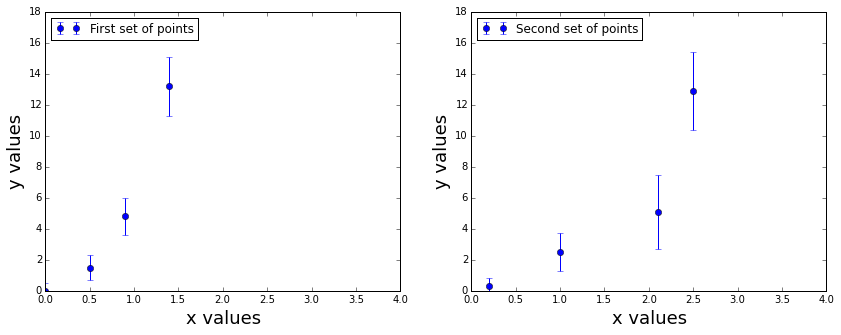

In [4]:
# Plot data points and uncertainties on two different figures
plt.figure(figsize=(14,5)) # Make 1 figure...
plt.subplot(1,2,1) # ...but divide it into 1 row, two columns, and plot the below on the 1st one. 
plt.errorbar(x1,y1,yerr=y1err,fmt='o',label="First set of points")
plt.xlim(0,4)
plt.ylim(0,18)
plt.xlabel('x values',fontsize=18)
plt.ylabel('y values',fontsize=18)
plt.legend(loc='upper left')

plt.subplot(1,2,2) # Again, divide the figure into 1 row, two columns, and plot the below on the 2nd one.
plt.errorbar(x2,y2,yerr=y2err,fmt='o',label="Second set of points")
plt.xlim(0,4)
plt.ylim(0,18)
plt.xlabel('x values',fontsize=18)
plt.ylabel('y values',fontsize=18)
plt.legend(loc='upper left')

# Uncomment the following to save the file as a .png format. Feel free to change the name from "myfigure.png"
#plt.savefit('myfigure.png')

# Uncomment the following if running on a non-Notebook environment.
#plt.show()

# Fit the data without accounting for uncertainties in the data.

The example below uses polyfit to fit to a quadratic. Check the [polyfit documentation](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) to see more options. 

[polyval](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyval.html) is used to overlay the fit result.s

Parameters from fit:
7.66666666667 -1.39371069182 0.0622641509434


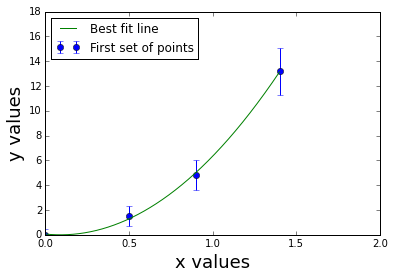

In [5]:
# Perform a quadratic fit to the data, ignoring the uncertainties
fitresults = np.polyfit(x1,y1,2)
a,b,c = fitresults # fitresults is a 3-element list
# y = ax^2 + bx + x
print "Parameters from fit:"
print a,b,c

# Plot data points and overlay the fit results
plt.figure()
plt.errorbar(x1,y1,yerr=y1err,fmt='o',label="First set of points")
xfit = np.linspace(min(x1),max(x1),1000) # Create an array of 1000 points spanning the range of x1
yfit = np.polyval(fitresults,xfit)
plt.plot(xfit,yfit,label='Best fit line')
plt.xlim(0,2)
plt.ylim(0,18)
plt.xlabel('x values',fontsize=18)
plt.ylabel('y values',fontsize=18)
plt.legend(loc='upper left')

# Uncomment the following to save the file as a .png format. Feel free to change the name from "myfigure.png"
#plt.savefit('myfigure.png')

# Uncomment the following if running on a non-Notebook environment.
#plt.show()

# Fit the data while incorporating experimental uncertainty.

This example makes use of the [curve_fit routine in the scipy.optimize libraries](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Note that you need to define your own function to fit to, in this case we have coded up a quadratic function called **quadfunc**. 

Parameters from fit:
7.28175411158 -0.920938387026 0.0140593079386


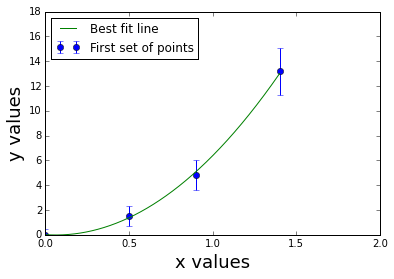

In [6]:
# Perform a quadratic fit to the data, making use of the uncertainties
def quadfunc(x,a,b,c):
    return a*x**2 + b*x + c

from scipy.optimize import curve_fit
fitresults,fituncertainties = curve_fit(quadfunc,x1,y1,sigma=y1err)

a,b,c = fitresults # fitresults is a 3-element list
# y = ax^2 + bx + x
print "Parameters from fit:"
print a,b,c

# n x n covariance matrix (uncertainties)
#print fituncertainties

# Plot data points and overlay the fit results
plt.figure()
plt.errorbar(x1,y1,yerr=y1err,fmt='o',label="First set of points")

xfit = np.linspace(min(x1),max(x1),1000) # Create an array of 1000 points spanning the range of x1
yfit = np.polyval(fitresults,xfit)
plt.plot(xfit,yfit,label='Best fit line')

plt.xlim(0,2)
plt.ylim(0,18)
plt.xlabel('x values',fontsize=18)
plt.ylabel('y values',fontsize=18)
plt.legend(loc='upper left')

# Uncomment the following to save the file as a .png format. Feel free to change the name from "myfigure.png"
#plt.savefit('myfigure.png')

# Uncomment the following if running on a non-Notebook environment.
#plt.show()

# Make a histogram.

This example shows you how to make a simple histogram. 

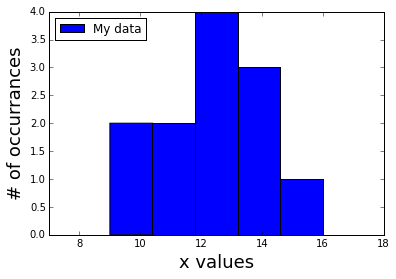

In [7]:
# Plot data points and uncertainties

# Here is just some sample data. You'll want to change this to use your
# own data. 
data = [12.5, 14.2, 12.9, 15.6, 14.1, 13.5, 9.8, 10.1, 10.6, 11.2, 12.6, 13.0]

plt.figure()
plt.hist(data, bins=5, range=(9,16),label='My data')
plt.xlim(7,18)
plt.xlabel('x values',fontsize=18)
plt.ylabel('# of occurrances',fontsize=18)
plt.legend(loc='upper left')

# Uncomment the following to save the file as a .png format. Feel free to change the name from "myfigure.png"
#plt.savefit('myfigure.png')

# Uncomment the following if running on a non-Notebook environment.
#plt.show()

# Read in data from a .csv file.

Here we demonstrate how to read in from a .csv file.

This example uses a file that has 
* A header row
* 5 columns that we will read in to 5 variables. 

In [8]:
import numpy as np

# You may need to change this part. For example, on many of the Macs, depending on where you saved the file
# and where you are running this code, you will want to do 
#filename = './Desktop/mydata.csv'
filename = './mydata.csv'

t,x,y,vx,vy = np.loadtxt(filename,delimiter=',',skiprows=1,unpack=True)

print t
print x
print y
print vx
print vy

[ 0.       0.03333  0.06667  0.1      0.1333   0.1667   0.2    ]
[  43.   71.  104.  161.  217.  242.  266.]
[  54.   90.  111.  136.  133.   95.   60.]
[  922.963  1070.741  1311.333  1461.358  1206.074   916.913   776.05 ]
[  966.632   799.763   581.017   181.568  -460.663  -860.718 -1018.509]
